In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt

random.seed(20200214)

In [2]:
player_names = ["Ömur", 
                "Zak", 
                "Andrey", 
                "Congyu", 
                "Fatih", 
                "Pavle", 
                "Christian", 
                "Ganesh",
                "Aurelien",
                "Marco"]

player_names = sorted(player_names)

In [3]:
class Player:
    def __init__(self, name, points):
        self.name = name
        self.points = points

class Team:

    def __init__(self, name, players):
        self.name = name
        self.players = players

    def __str__(self):
        return "Team {name} \t({p1} and {p2})".format(name=self.name, 
                                                    p1=self.players[0].name,
                                                    p2=self.players[1].name)
    def scoring_dict(self, points):
        return {self.players[0].name: points, self.players[1].name: points}

class Match:

    def __init__(self, team1, team2):
        self.team1 = team1
        self.team2 = team2
        
    def __str__(self):
        return "{} \t vs \t {}".format(self.team1, self.team2)

    def demonstrate(self):
        print(str(self))
        
    def accept(self, record):
        for team_name in record.team_names:
            if team_name not in [self.team1.name, self.team2.name]:
                return False
        return True
        

class Record:
    
    def __init__(self, team_names, scores):
        """
        
        :param: String, eg. "tiger:bat"
        :param: String, eg. "8:10"
        """
        
        self.team_names = team_names.split(":")
        self.scores = [int(score) for score in scores.split(":")]
    
    def pointsboard(self, teams):
        
        pointsboard = {}
        for i in range(len(self.team_names)):
            notify_teams = [team for team in teams if team.name == self.team_names[i]]
            for team in notify_teams:
                pointsboard.update(team.scoring_dict(self.scores[i]))
        return pointsboard

class Season:
              
    team_names = ["bat", "elephant", "bear", "dolphin", "camel", "tiger", "snake", "lion", "panda"]

    def __init__(self, names):
        self.players = [Player(name, 0) for name in names]
        self.records = []
        self.matches = []
        self.finished_matches = []
        
        self.generate_teams()  # warning! this will shuffle the players and resign team names
        self.generate_matches()
    
    def generate_teams(self):
        random.shuffle(self.team_names)
        random.shuffle(self.players)
        
        teams = []
        for i, (p1, p2) in enumerate(self._generate_tuples(self.players)):
            teams.append(Team(self.team_names[i], [p1, p2]))
                
        self.teams = teams
        
    def generate_matches(self):
        self.matches = [Match(*team_tuple) for team_tuple in self._generate_wheel_war(self.teams)]

    def show_matches(self):
        for match in self.matches:
            match.demonstrate()
            
    def show_remain_matches(self):
        for match in self.remain_matches:
            match.demonstrate()
    
    def add_record(self, record):
        """
        
        :param: record: Record
        """
        for match in self.matches:
            if match.accept(record):
                self.finished_matches.append(match)
                self.records.append(record)
                break
    
    @property
    def remain_matches(self):
        return [match for match in self.matches if str(match) not in [str(match) for match in self.finished_matches]]
    
    
    def load_points_from_pointsboard(self, pointsboard):
        """
        
        pointsboard: dict: {player_name: points}
        """
        
        for player in self.players:
            if player.name in pointsboard:
                player.points += pointsboard[player.name] 
    
    def load_points_from_records(self):
        for record in self.records:
            self.load_points_from_pointsboard(record.pointsboard(self.teams))
    
    @property
    def pointsboard(self):
        pointsboard = {}
        for player in self.players:
            pointsboard.update({player.name: player.points})
        return pointsboard
    
    def show_pointsboard(self):
        
        self.load_points_from_records()
        
        pb = self.pointsboard
        df = pd.DataFrame({
            "player": list(pb.keys()), 
            "KC-points": list(pb.values())
        })
        df = df.sort_values(by=["KC-points"])
        df.plot.barh(x="player", y="KC-points")
        plt.show()
        
    @staticmethod
    def _generate_tuples(items):
        left = items[0:int(len(items)/2)]
        right = items[int(len(items)/2):]
        return [(item_left, item_right) for item_left, item_right in zip(left, right)]
    
    @staticmethod
    def _generate_wheel_war(items):
        return [(items[i-1], items[i]) for i in range(len(items))]
    
    def switch_members(self):
        
        fix_index = [random.randint(0, 1) for i in range(len(self.teams))]
        fixed_players = [team.players[fix_index[i]] for i, team in enumerate(self.teams)]
        switch_players = [team.players[1-fix_index[i]] for i, team in enumerate(self.teams)]
        switched_players = [switch_players[n-2] for n in range(len(switch_players))]
                            
        teams = []
        for i, (p1, p2) in enumerate(zip(fixed_players, switched_players)):
            teams.append(Team(self.team_names[i], [p1, p2]))
        
        s = Season([p.name for p in self.players])
        s.teams = teams
        s.generate_matches()
        return s

In [4]:
s = Season(player_names)
s.show_matches()

Team tiger 	(Aurelien and Fatih) 	 vs 	 Team bear 	(Congyu and Andrey)
Team bear 	(Congyu and Andrey) 	 vs 	 Team snake 	(Ganesh and Christian)
Team snake 	(Ganesh and Christian) 	 vs 	 Team dolphin 	(Marco and Zak)
Team dolphin 	(Marco and Zak) 	 vs 	 Team camel 	(Pavle and Ömur)
Team camel 	(Pavle and Ömur) 	 vs 	 Team tiger 	(Aurelien and Fatih)


In [5]:
s.add_record(Record("tiger:bear", "8:10"))
s.add_record(Record("bear:snake", "7:10"))
s.add_record(Record("snake:dolphin", "10:8"))
s.add_record(Record("dolphin:camel", "10:2"))
s.add_record(Record("camel:tiger", "10:7"))

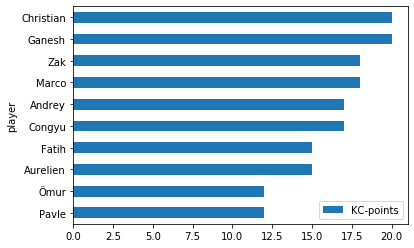

In [6]:
s.show_pointsboard()

In [7]:
s.show_remain_matches()

In [8]:
pointsboard_last_season = s.pointsboard

In [9]:
pointsboard_last_season

{'Congyu': 17,
 'Ganesh': 20,
 'Marco': 18,
 'Pavle': 12,
 'Aurelien': 15,
 'Andrey': 17,
 'Christian': 20,
 'Zak': 18,
 'Ömur': 12,
 'Fatih': 15}

# Season 2

In [10]:
# s2 = Season(player_names)

# s2.load_points_from_pointsboard(pointsboard_last_season)

# s2.show_pointsboard()

In [11]:
s2 = s.switch_members()

In [12]:
s2.show_matches()

Team tiger 	(Aurelien and Zak) 	 vs 	 Team bear 	(Andrey and Ömur)
Team bear 	(Andrey and Ömur) 	 vs 	 Team snake 	(Christian and Fatih)
Team snake 	(Christian and Fatih) 	 vs 	 Team dolphin 	(Marco and Congyu)
Team dolphin 	(Marco and Congyu) 	 vs 	 Team camel 	(Pavle and Ganesh)
Team camel 	(Pavle and Ganesh) 	 vs 	 Team tiger 	(Aurelien and Zak)
